In [1]:
from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

import os
import copy


import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

import gc

from PIL import Image

In [2]:
# create lists for test and train datasets

num_l = []
for f in os.listdir('data/dataset/images'):
    num_l.append(f[:3])

test_fl = num_l[:int(len(num_l) * 0.2)]
train_fl = num_l[int(len(num_l) * 0.2):]

In [3]:
class CustomDataset(Dataset):
    def __init__(self, root_dir, data_folder, label_folder, num_files):
        """
        Args:
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.root_dir = root_dir
        self.data_folder = data_folder
        self.label_folder = label_folder
        self.data_dir = os.path.join(root_dir, data_folder)
        self.label_dir = os.path.join(root_dir, label_folder)
        self.transform = transforms.ToTensor()
        # print(num_files)
        # self.image_files = [os.path.join(self.data_dir, f) for f in os.listdir(self.data_dir) if (f.endswith(('.png')) and f[:3] in num_files)]
        self.image_files = []
        for f in os.listdir(self.data_dir):
            # print(f[:3])
            # print(f[:3] in num_files)
            if f.endswith(('.png')) and f[:3] in num_files:
                self.image_files.append(os.path.join(self.data_dir, f))
        # print(self.image_files)

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        image = Image.open(img_name).convert('RGB')  # Ensure image is RGB
        image = self.transform(image)
        
        label_name = img_name.replace('cell', 'dots').replace(self.data_folder, self.label_folder)
        label_image = Image.open(label_name).convert('RGB')  # Ensure image is RGB
        label_image = self.transform(label_image)
        
        # label = label_image.sum()
        label = label_image
        return image, label


dir = 'data/dataset'
dataset_test = CustomDataset(dir, 'images', 'labels', test_fl)
dataloader_test = DataLoader(dataset_test, batch_size=8, shuffle=False)

dataset_train = CustomDataset(dir, 'images', 'labels', train_fl)
dataloader_train = DataLoader(dataset_train, batch_size=8, shuffle=False)

[115, 235, 193, 116, 136, 168, 190, 192]


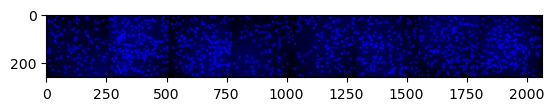

In [4]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# take a look at the test data

# Get a batch of training data
images, labels = next(iter(dataloader_test))

# Make a grid from batch
out = torchvision.utils.make_grid(images)

print([int(i.sum()) for i in labels])
imshow(out)

[102, 156, 220, 200, 197, 178, 74, 206]


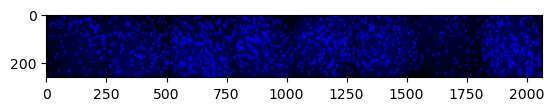

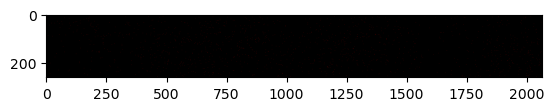

In [5]:
# take a look at the train data

# Get a batch of training data
images, labels = next(iter(dataloader_train))

# Make a grid from batch
out = torchvision.utils.make_grid(images)

print([int(i.sum()) for i in labels])
imshow(out)
imshow(torchvision.utils.make_grid(labels))

In [6]:
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
device

device(type='mps')

In [7]:
# class DotCounterNet(nn.Module):
#     def __init__(self):
#         super(DotCounterNet, self).__init__()
#         self.conv1 = nn.Conv2d(3, 6, 5)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(6, 16, 5)
#         self.conv3 = nn.Conv2d(16, 32, 3)
#         self.dropout = nn.Dropout(0) # better results wo dropout

#         self.fc1 = nn.Linear(32 * 29 * 29, 300)  
#         self.fc2 = nn.Linear(300, 100)
#         self.fc3 = nn.Linear(100, 1)  

#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = self.pool(F.relu(self.conv3(x)))

#         x = torch.flatten(x, 1)
#         x = self.dropout(F.relu(self.fc1(x)))
#         x = self.dropout(F.relu(self.fc2(x)))
#         x = self.fc3(x)  
#         return x

# net = DotCounterNet()


In [32]:
# model = net.to(device)

In [254]:
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# criterion = nn.MSELoss()
# num_epochs = 50

In [255]:
# loss_l_tr, loss_l_val=[], []
# l2_reg = [0, 0.001, 1e-5]

# def train_model(model, dataloaders, criterion, optimizer, num_epochs, l2_strength): # , scheduler, num_epochs=25

#     for epoch in range(num_epochs):
#         print('Epoch {}/{}'.format(epoch, num_epochs - 1))
#         print('-' * 10)
        

#         for phase in ['train', 'val']:
#             running_loss = 0.0
            
#             if phase=='train':
#                 model.train()
#             else:
#                 model.eval()

#             for inputs, labels in dataloaders[0 if phase=='train' else 1]:
#                 inputs=inputs.to(device)
#                 labels = labels.to(device)
#                 outputs = model(inputs)
#                 loss = criterion(outputs, labels.view(-1, 1))  

#                 if phase=='train':

#                     optimizer.zero_grad()

#                     # L2 Regularization
#                     if l2_strength > 0:
#                         l2_reg_ = torch.tensor(0.).to(device)
#                         for param in model.parameters():
#                             l2_reg_ += torch.norm(param, 2)**2
#                         loss += l2_strength * l2_reg_
                        
#                     loss.backward()
#                     optimizer.step()

#                 running_loss += loss.item() * inputs.size(0)

#             epoch_loss = running_loss / len(dataset_train if phase=='train' else dataset_test)

            
#             if phase=='train':
#                 loss_l_tr.append(epoch_loss)

#             else:
#                 loss_l_val.append(epoch_loss)


#             print(f'{phase} Epoch {epoch+1}, Loss: {epoch_loss}')

#     return model

# model = train_model(model,
#                     [dataloader_train, dataloader_test],
#                        criterion,
#                        optimizer,
#                        num_epochs,
#                        l2_reg[2]
#                        )

Epoch 0/49
----------
train Epoch 1, Loss: 31002.7421875
val Epoch 1, Loss: 18175.194227430555
Epoch 1/49
----------
train Epoch 2, Loss: 5825.767957899306
val Epoch 2, Loss: 2088.428765190972
Epoch 2/49
----------
train Epoch 3, Loss: 2909.144382052951
val Epoch 3, Loss: 1951.0274183485244
Epoch 3/49
----------
train Epoch 4, Loss: 2004.3338690863716
val Epoch 4, Loss: 1671.7312961154514
Epoch 4/49
----------
train Epoch 5, Loss: 1423.7901204427083
val Epoch 5, Loss: 1225.2388814290364
Epoch 5/49
----------
train Epoch 6, Loss: 1411.0613606770833
val Epoch 6, Loss: 1162.2196756998699
Epoch 6/49
----------
train Epoch 7, Loss: 1286.4485541449653
val Epoch 7, Loss: 1052.484639485677
Epoch 7/49
----------
train Epoch 8, Loss: 1139.1917385525173
val Epoch 8, Loss: 994.738535563151
Epoch 8/49
----------
train Epoch 9, Loss: 1116.70166015625
val Epoch 9, Loss: 972.5505167643229
Epoch 9/49
----------
train Epoch 10, Loss: 1073.635057237413
val Epoch 10, Loss: 894.2389695909288
Epoch 10/49
--

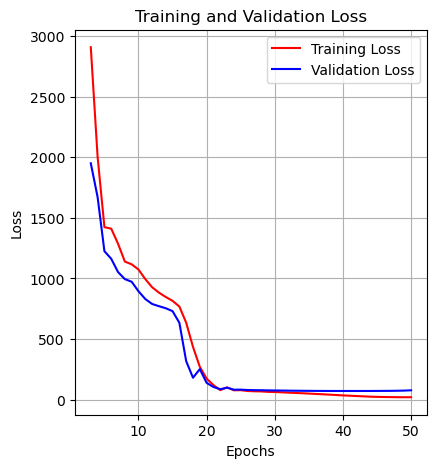

In [262]:
# plt.figure(figsize=(10, 5))
# epochs = range(3, num_epochs + 1)

# plt.subplot(1, 2, 1)
# plt.plot(epochs, loss_l_tr[2:], 'r', label='Training Loss')
# plt.plot(epochs, loss_l_val[2:], 'b', label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid(True)

# plt.show();

In [7]:
class UNet(nn.Module):
    def __init__(self):
        super().__init__()

        # encoder (downsampling)
        self.enc_conv0 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )

        self.pool0 = nn.MaxPool2d(kernel_size=2) # 256 -> 128

        self.enc_conv1 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU()
        )
        self.pool1 = nn.MaxPool2d(kernel_size=2) # 128 -> 64

        self.enc_conv2 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU()
        )

        self.pool2 = nn.MaxPool2d(kernel_size=2) # 64 -> 32

        self.enc_conv3 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
        )
        self.pool3 = nn.MaxPool2d(kernel_size=2) # 32 -> 16

        # bottleneck
        self.bottleneck_conv = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=1, padding=0),
            nn.BatchNorm2d(1024),
            nn.ReLU(),
            nn.Conv2d(in_channels=1024, out_channels=1024, kernel_size=1, padding=0),
            nn.BatchNorm2d(1024),
            nn.ReLU()
        )

        # decoder (upsampling)
        self.upsample0 = nn.Sequential(
            nn.Upsample(scale_factor=2),  # 16 -> 32
            nn.Conv2d(in_channels=1024, out_channels=512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
        )

        self.dec_conv0 = nn.Sequential(
            nn.Conv2d(in_channels=1024, out_channels=512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
        )

        self.upsample1 = nn.Sequential(
            nn.Upsample(scale_factor=2),  # 32 -> 64
            nn.Conv2d(in_channels=512, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU()
        )

        self.dec_conv1 = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU()
        )

        self.upsample2 = nn.Sequential(
            nn.Upsample(scale_factor=2),  # 64 -> 128
            nn.Conv2d(in_channels=256, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU()
        )

        self.dec_conv2 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU()
        )

        self.upsample3 = nn.Sequential(
            nn.Upsample(scale_factor=2),  # 128 -> 256
            nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )

        self.dec_conv3 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=1, kernel_size=1, padding=0)
        )

    def forward(self, x):
        # encoder
        e0 = self.enc_conv0(x)
        e1 = self.enc_conv1(self.pool0(e0))
        e2 = self.enc_conv2(self.pool1(e1))
        e3 = self.enc_conv3(self.pool2(e2))

        # bottleneck
        b = self.bottleneck_conv(self.pool3(e3))

        # decoder
        d0 = self.dec_conv0(torch.cat([self.upsample0(b), e3], 1))
        d1 = self.dec_conv1(torch.cat([self.upsample1(d0), e2], 1))
        d2 = self.dec_conv2(torch.cat([self.upsample2(d1), e1], 1))
        d3 = self.dec_conv3(torch.cat([self.upsample3(d2), e0], 1))
        return d3.sigmoid()

In [8]:
model = UNet()
model.to(device)

UNet(
  (enc_conv0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (pool0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (enc_conv1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (enc_conv2): Sequential(
    (0): 

In [13]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.002)
criterion = nn.MSELoss()
num_epochs = 40

In [14]:
def counts_dots_tensor(img):
  return torch.sum(img, dim=(2, 3)) #return torch.sum(img > 0.1, dim=(2, 3))

def MAE(y_real, y_pred):
  n_pred = counts_dots_tensor(y_pred)
  n_real = counts_dots_tensor(y_real)
  # return (((n_pred - n_real)**2)/1.).mean()
  return torch.abs(n_pred - n_real).float().mean() 

In [16]:
loss_l_tr, loss_l_val, score_l_tr, score_l_val =[], [], [], []
l2_reg = [0, 0.001, 1e-5]

def train_model(model, dataloaders, criterion, optimizer, num_epochs, l2_strength): # , scheduler, num_epochs=25

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        

        for phase in ['train', 'val']:
            running_loss = 0.0
            running_score = 0.0
            
            if phase=='train':
                model.train()
            else:
                model.eval()

            for inputs, labels in dataloaders[0 if phase=='train' else 1]:
                inputs=inputs.to(device)
                labels = labels.to(device).unsqueeze(1)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                score = MAE(outputs, labels)  

                if phase=='train':

                    optimizer.zero_grad()

                    # L2 Regularization
                    if l2_strength > 0:
                        l2_reg_ = torch.tensor(0.).to(device)
                        for param in model.parameters():
                            l2_reg_ += torch.norm(param, 2)**2
                        loss += l2_strength * l2_reg_
                        
                    loss.backward()
                    optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_score += score.item() * inputs.size(0)

                
            epoch_loss = running_loss / len(dataset_train if phase=='train' else dataset_test)
            epoch_score = running_score / len(dataset_train if phase=='train' else dataset_test)

            
            if phase=='train':
                loss_l_tr.append(epoch_loss)
                score_l_tr.append(epoch_score)

            else:
                loss_l_val.append(epoch_loss)
                score_l_val.append(epoch_score)

            print(f'{phase} Epoch {epoch+1}, Loss: {epoch_loss}, Score: {epoch_score}')

            if phase=='val':
                # Visualize tools
                # clear_output(wait=True)
                plt.figure(figsize=(10, 6))
                for k in range(4):
                    plt.subplot(3, 4, k+1)
                    plt.imshow(np.rollaxis(inputs[k].cpu().numpy(), 0, 3), cmap='gray')
                    plt.title('Real')
                    plt.axis('off')

                    plt.subplot(3, 4, k+5)
                    plt.title('Output: %d' % outputs[k].sum())
                    plt.imshow(outputs[k, 0].cpu().detach().numpy(), cmap='gray')
                    # plt.title('Output: %d' % counts_dots_tensor(outputs)[k].item())
                    plt.axis('off')

                    # plt.subplot(4, 6, k+13)
                    # plt.imshow((torch.ones_like(Y_hat) * (Y_hat > 0.1))[k, 0], cmap='gray')
                    # plt.title('Thresholded')
                    # plt.axis('off')

                    plt.subplot(3, 4, k+9)
                    # plt.imshow((torch.ones_like(labels) * (labels > 0.1))[k, 0], cmap='gray')
                    # plt.imshow(labels[k, 0].cpu().numpy())
                
                    plt.imshow(np.transpose(labels[k, 0].cpu(), (1, 2, 0)))
                    
                    # plt.title('Ground truth: %d' % counts_dots_tensor(labels[k,0]))
                    plt.title('Ground truth: %d' % labels[k,0].sum())
                    plt.axis('off')

                plt.suptitle('%d / %d - loss: %f; score: %f' % (epoch+1, num_epochs, running_loss, running_score))
                plt.show()

            # reduce memomory size
            del inputs, labels, outputs, loss  # Explicitly deleting tensors
            gc.collect()  # Invoking garbage collection manually


    return model

Epoch 0/39
----------
train Epoch 1, Loss: 0.020293610480924446, Score: 21.9420231713189
val Epoch 1, Loss: 0.000909022159046597, Score: 27.316090901692707


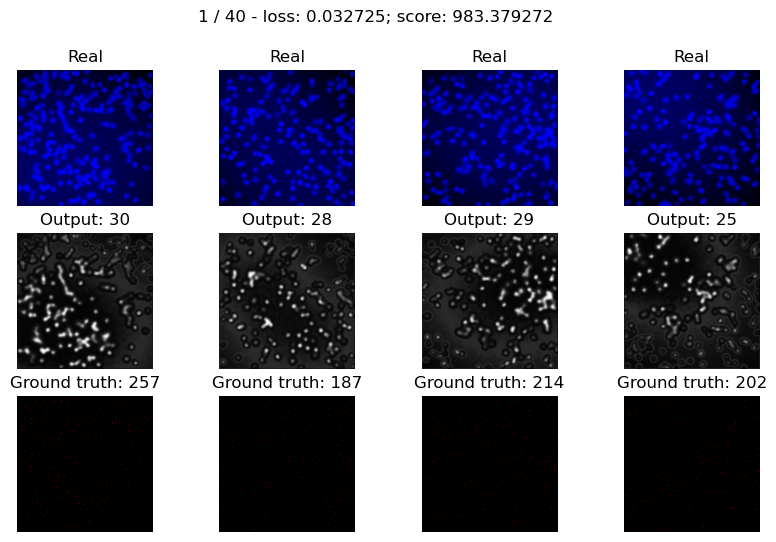

Epoch 1/39
----------


In [17]:
model = train_model(model,
                    [dataloader_train, dataloader_test],
                       criterion,
                       optimizer,
                       num_epochs,
                       l2_reg[2]
                       )

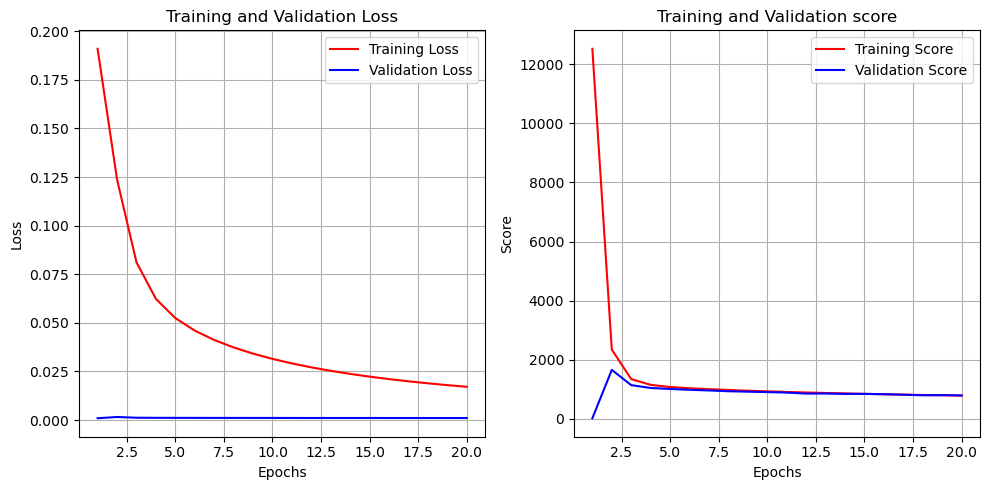

In [ ]:
plt.figure(figsize=(10, 5))
epochs = range(1, num_epochs + 1)

plt.subplot(1, 2, 1)
plt.plot(epochs, loss_l_tr, 'r', label='Training Loss')
plt.plot(epochs, loss_l_val, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs, score_l_tr, 'r', label='Training Score')
plt.plot(epochs, score_l_val, 'b', label='Validation Score')
plt.title('Training and Validation score')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show();